In [452]:
# open rads data
# 1 suck up the ascii using pandas
# find the time lat crossing lat and add to time
# set time lims
# set lon/lat lims
# bin

In [295]:
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
import glob
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as cl
from netCDF4 import Dataset
import sys
import imp
import copy
sys.path.insert(0, '/Users/H/WAVES/geo_data_group/')
import grid_set as gs
import data_year as dy
from scipy import stats
import gc
sys.path.insert(0,'/Users/H/INVERSE/NASA_GSFC/')
import NSIDC_IC as ic
imp.reload(ic)
imp.reload(dy)

<module 'data_year' from '/Users/H/WAVES/geo_data_group/data_year.py'>

In [298]:
m = Basemap(projection='stere', lon_0=0.0, lat_0=90, lat_ts=70, 
                height = 3335000*2, width = 3335000*2)
G = gs.grid_set(m)
G.load_grid('/Users/H/WAVES/DOT_processing/grids/Polar_stereo_100km.npz')
G.load_mask('/Users/H/WAVES/DOT_processing/grids/Polar_stereo_100km_mask_no_inf.npz')
G.get_ptp()

Loaded a grid: /Users/H/WAVES/DOT_processing/grids/Polar_stereo_100km.npz
Loaded mask,  67  x  67  inflated by  0.0


In [413]:
def CorCoeff_array(array1,array2,mask = False):
    """
    applys np.corcoeff over 3d arrays, 
    correlating the axis 0 dimesnion for axis 1/2
    deals with all nan values too
    additonal logical mask allows to ignore certain data
    """
    t,m,n = np.shape(array1)
    if type(mask) == bool:
        mask_u = np.ones([t,m,n],dtype=bool)
    else:
        mask_u = mask
    CorCoeff = np.empty([m,n])
    for i in range(m):
        for j in range(n):
            if np.isfinite(array1[:,i,j]).any()&mask_u[:,i,j].any():
                msk = np.isfinite(array1[:,i,j])&np.isfinite(array2[:,i,j])&mask_u[:,i,j]
                CorCoeff[i,j] = np.corrcoef(array1[:,i,j][msk],
                                            array2[:,i,j][msk])[0,1]
            else:
                CorCoeff[i,j] = np.nan
    return CorCoeff

In [415]:
swh_list = []
# swh_list.append(dy.load_data_year('/Users/H/WAVES/SWH/swh_arrays/SWH_100km_1d_2014_fixed_raw.npz'))
# swh_list.append(dy.load_data_year('/Users/H/WAVES/SWH/swh_arrays/SWH_100k_raw_2011-2019.npz'))
swh_list.append(dy.load_data_year('/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100km_1d_all_orb_raw.npz'))
swh_list.append(dy.load_data_year('/Users/H/WAVES/SWH_rads/Rads_binned_2014_(all).npz'))
swh_list.append(dy.load_data_year('/Users/H/WAVES/SWH_rads/WW_binned_2014_(all).npz'))
# swh_list.append(dy.load_data_year('/Users/H/WAVES/SWH/First_saves_2014/SWH_100km_1_day_raw.npz'))
# swh_list.append(dy.load_data_year('/Users/H/WAVES/SWH_rads/Rads_binned_2014_(02-04).npz'))
# swh_list.append(dy.load_data_year('/Users/H/WAVES/SWH_rads/WW_binned_2014_(02-04).npz'))


In [416]:
# ice_binned = dy.load_data_year('/Users/H/WAVES/SWH_rads/Ice_binned_2014_(all).npz')
# ice_binned = dy.load_data_year('/Users/H/WAVES/SWH_rads/Ice_binned_2014_(02-04).npz')
ice_binned = dy.load_data_year('/Volumes/BU_extra/NSIDC/daily/2011-2019_100km_grided.npz')

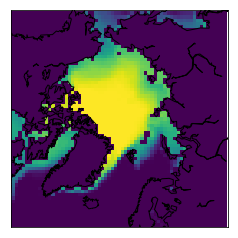

In [419]:
# ice_binned.cut_date(swh_list[1].dates[0],swh_list[1].dates[-1])

m.pcolormesh(G.xptp,G.yptp,np.nansum(ice_binned.mask,axis=0).T)
m.drawcoastlines()
plt.show()

In [420]:
# rads/ww dates are bad for some reason
rads_dates = [swh_list[1].dates[0] + relativedelta(days = d)
             for d in range(swh_list[1].n_t)]

swh_list[1].dates = rads_dates
swh_list[2].dates = rads_dates
swh_list[0].periods = 366
swh_list[1].periods = 366
swh_list[2].periods = 366

In [421]:
file = '/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100km_1d_all_orb_SAR_binc.npz'
SAR_binc = dy.load_data_year(file)
file = '/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100km_1d_all_orb_LRM_binc.npz'
LRM_binc = dy.load_data_year(file)

# LRM_binc = dy.load_data_year('/Users/H/WAVES/SWH/swh_arrays/SWH_100km_1d_2014_low_error_LRM_binc.npz')
# SAR_binc = dy.load_data_year('/Users/H/WAVES/SWH/swh_arrays/SWH_100km_1d_2014_low_error_SAR_binc.npz')

# LRM_binc = dy.load_data_year('/Users/H/WAVES/SWH/swh_arrays/SWH_100km_1d_2014_fixed_SAR_binc.npz')
# SAR_binc = dy.load_data_year('/Users/H/WAVES/SWH/swh_arrays/SWH_100km_1d_2014_fixed_LRM_binc.npz')

In [422]:
ice_binned.cut_date(swh_list[1].dates[0],swh_list[1].dates[-1])
swh_list[0].cut_date(swh_list[1].dates[0],swh_list[1].dates[-1])
swh_list[1].cut_date(swh_list[1].dates[0],swh_list[1].dates[-1])
swh_list[2].cut_date(swh_list[1].dates[0],swh_list[1].dates[-1])
SAR_binc.cut_date(swh_list[1].dates[0],swh_list[1].dates[-1])
LRM_binc.cut_date(swh_list[1].dates[0],swh_list[1].dates[-1])

removing 2923 time points
New data_year, size 364, for 1 years
removing 2922 time points
New data_year, size 364, for 1 years
removing 0 time points
New data_year, size 364, for 1 years
removing 0 time points
New data_year, size 364, for 1 years
removing 2922 time points
New data_year, size 364, for 1 years
removing 2922 time points
New data_year, size 364, for 1 years


In [423]:
# temp = swh.ravel(mask=True) 
ocean_only = np.ones_like(swh_list[1].data,dtype=bool)
ocean_only[ice_binned.mask] = False
for i in range(0,3):
    swh_list[i].mask = ocean_only
# swh.build_static_mask(np.isnan())

In [424]:
mix_mask = np.ones_like(swh_list[0].data,dtype=bool)
for i in range(3):
    print(np.sum(np.isfinite(swh_list[i].data)))
    mix_mask[swh_list[i].mask==False] = False
    mix_mask[np.isnan(swh_list[i].data)] = False
np.sum(mix_mask)

93240
196217
52544


46484

In [425]:
LRM_mask = copy.copy(mix_mask)
LRM_mask[LRM_binc.data<2] = False
np.sum(LRM_mask)

23706

In [426]:
SAR_mask = copy.copy(mix_mask)
SAR_mask[SAR_binc.data<2] = False
np.sum(SAR_mask)

22815

In [427]:
np.sum(SAR_mask)+np.sum(LRM_mask),np.sum(mix_mask)

(46521, 46484)

In [428]:
for i in range(3):
    print(np.shape(swh_list[i].ravel(periods=periods,mask=mix_mask,remove_nan=True)))

(46484,)
(46484,)
(46484,)


In [429]:
CorCoeff = np.empty([swh_list[0].m,swh_list[0].n])
for i in range(swh_list[0].m):
    for j in range(swh_list[0].n):
        if np.isfinite(swh_list[0].data[:,i,j]).any()&ocean_only[:,i,j].any():
            msk = np.isfinite(swh_list[0].data[:,i,j])&np.isfinite(swh_list[1].data[:,i,j])
            CorCoeff[i,j] = np.corrcoef(swh_list[0].data[:,i,j][msk],
                                        swh_list[1].data[:,i,j][msk])[0,1]
        else:
            CorCoeff[i,j] = np.nan

/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/H/anaconda/lib/python3.6/sit

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


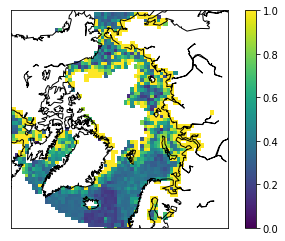

/Users/H/WAVES/geo_data_group/data_year.py:384: RuntimeWarning: Mean of empty slice
  axis = 0)
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


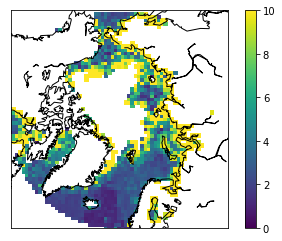

/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/H/anaconda/lib/python3.6/sit

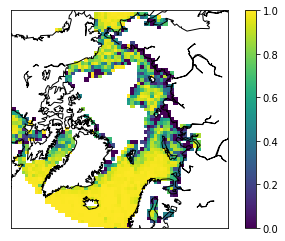

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice


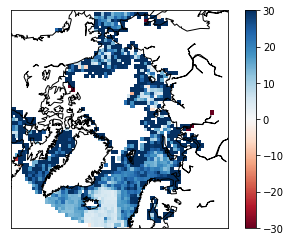

In [432]:
temp = (swh_list[0].data-swh_list[1].data)**2
temp[ocean_only==False] = np.nan
temp_mean = np.nanmean(temp,axis=0)
# m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T,norm=cl.LogNorm(),
#              vmin=2e-1,vmax=8e-1)
m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T)
m.drawcoastlines()
# plt.clim([1e-2,10])
plt.clim([0.0,1.0])
# plt.imshow(np.nansum(ocean_only,axis=0))
plt.colorbar()
plt.show()

# m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T,norm=cl.LogNorm(),
#              vmin=2e-1,vmax=8e-1)
temp_mean=temp_mean/swh_list[0].clim_map(periods=periods,mask=ocean_only)
m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean*100).T)
m.drawcoastlines()
# plt.clim([1e-2,10])
plt.clim([0.0,10])
# plt.imshow(np.nansum(ocean_only,axis=0))
plt.colorbar()
plt.show()

CorCoeff = CorCoeff_array(swh_list[0].data,swh_list[1].data,
                         mask = ocean_only)

m.pcolormesh(G.xptp,G.yptp,CorCoeff.T)
m.drawcoastlines()
# plt.clim([1e-2,10])
plt.clim([0.0,1])
# plt.imshow(np.nansum(ocean_only,axis=0))
plt.colorbar()
plt.show()


start_time = swh_list[0].dates[0]
end_time = swh_list[0].dates[-1]
dt1 = start_time+relativedelta(days=10*pp)
# dt2 = dt1+relativedelta(days=10)
dt2 = end_time
periods = swh_list[0].get_periods(dt1,dt2)
temp = (swh_list[1].data-swh_list[0].data)/swh_list[0].data
temp[ocean_only==False] = np.nan
# temp_mean=swh_list[0].clim_map(periods=periods,mask=ocean_only)
# temp_mean=np.nanmean(temp,axis=0)/temp_mean*100
temp_mean=np.nanmean(temp,axis=0)*100
# m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T,norm=cl.LogNorm(),
#              vmin=2e-1,vmax=8e-1)
m.pcolormesh(G.xptp,G.yptp,temp_mean.T,cmap='RdBu')
m.drawcoastlines()
plt.clim([-30,30])
# plt.clim([0.2,0.8])
# plt.imshow(np.nansum(ocean_only,axis=0))
plt.colorbar()
plt.show()

In [ ]:
# 3012461/20
# G0W1 1608 9452 F2J5 

In [414]:
CorCoeff = np.empty([swh_list[0].m,swh_list[0].n])
for i in range(swh_list[0].m):
    for j in range(swh_list[0].n):
        if np.isfinite(swh_list[0].data[:,i,j]).any()&ocean_only[:,i,j].any():
            msk = np.isfinite(swh_list[0].data[:,i,j])&np.isfinite(swh_list[2].data[:,i,j])
            CorCoeff[i,j] = np.corrcoef(swh_list[0].data[:,i,j][msk],
                                        swh_list[2].data[:,i,j][msk])[0,1]
        else:
            CorCoeff[i,j] = np.nan

ValueError: operands could not be broadcast together with shapes (356,) (364,) 

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


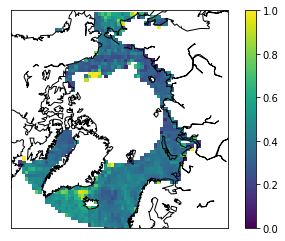

/Users/H/WAVES/geo_data_group/data_year.py:384: RuntimeWarning: Mean of empty slice
  axis = 0)
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


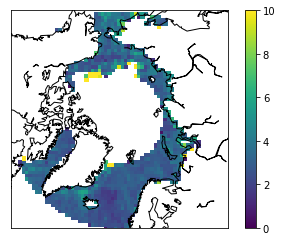

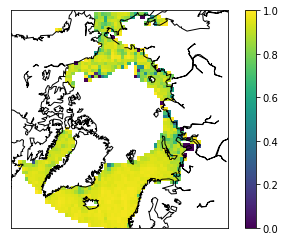

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in true_divide
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: Mean of empty slice


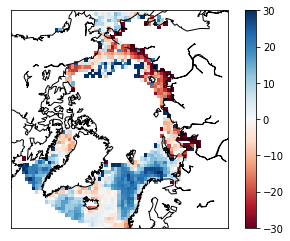

In [394]:
temp = (swh_list[0].data-swh_list[2].data)**2
temp[ocean_only==False] = np.nan
temp_mean = np.nanmean(temp,axis=0)
# m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T,norm=cl.LogNorm(),
#              vmin=2e-1,vmax=8e-1)
m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T)
m.drawcoastlines()
# plt.clim([1e-2,10])
plt.clim([0.0,1.0])
# plt.imshow(np.nansum(ocean_only,axis=0))
plt.colorbar()
plt.show()

# m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T,norm=cl.LogNorm(),
#              vmin=2e-1,vmax=8e-1)
temp_mean=temp_mean/swh_list[0].clim_map(periods=periods,mask=ocean_only)
m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean*100).T)
m.drawcoastlines()
# plt.clim([1e-2,10])
plt.clim([0.0,10])
# plt.imshow(np.nansum(ocean_only,axis=0))
plt.colorbar()
plt.show()

m.pcolormesh(G.xptp,G.yptp,CorCoeff.T)
m.drawcoastlines()
# plt.clim([1e-2,10])
plt.clim([0.0,1])
# plt.imshow(np.nansum(ocean_only,axis=0))
plt.colorbar()
plt.show()


start_time = swh_list[0].dates[0]
end_time = swh_list[0].dates[-1]
dt1 = start_time+relativedelta(days=10*pp)
# dt2 = dt1+relativedelta(days=10)
dt2 = end_time
periods = swh_list[0].get_periods(dt1,dt2)
temp = (swh_list[2].data-swh_list[0].data)/swh_list[0].data
temp[ocean_only==False] = np.nan
# temp_mean=swh_list[0].clim_map(periods=periods,mask=ocean_only)
# temp_mean=np.nanmean(temp,axis=0)/temp_mean*100
temp_mean=np.nanmean(temp,axis=0)*100
# m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T,norm=cl.LogNorm(),
#              vmin=2e-1,vmax=8e-1)
m.pcolormesh(G.xptp,G.yptp,temp_mean.T,cmap='RdBu')
m.drawcoastlines()
plt.clim([-30,30])
# plt.clim([0.2,0.8])
# plt.imshow(np.nansum(ocean_only,axis=0))
plt.colorbar()
plt.show()

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


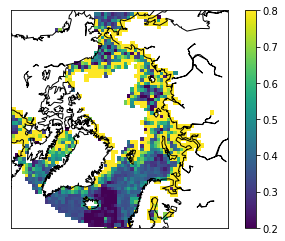

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()


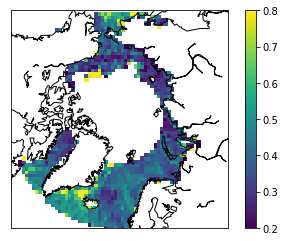

In [334]:
temp = (swh_list[0].data-swh_list[2].data)**2
temp[ocean_only==False] = np.nan
temp_mean = np.nanmean(temp,axis=0)
m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T)
m.drawcoastlines()
# plt.clim([0,1])
plt.clim([0.2,0.8])
# plt.imshow(np.nansum(ocean_only,axis=0))
plt.colorbar()
plt.show()

In [529]:
def scatter_plot(s1,s2,msk,xl,yl,tit,alpha=1.0,cl='k',line = True,yticks=True):
    plt.plot([0,10],[0,10],'--k')
    x=s1.ravel(periods=periods,mask=msk,remove_nan=False)
    y=s2.ravel(periods=periods,mask=msk,remove_nan=False)
    plt.scatter(x,y, s=0.2,alpha=alpha,c=cl)
    if line:
        b,mp = pf(x,y,1)
        plt.text(5.5,3,'Slope = '+str(round(mp,2)))
        plt.text(4.1,2,'Intercept = '+str(round(b,2)))
        plt.plot(x,b+mp*x,'-r')
        cc = np.corrcoef(x,y)[0,1]
        plt.text(5.5,1,'Cor. = '+str(round(cc,2)))
    if yticks==False:
        plt.yticks([])
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.title(tit)
    plt.xlim([0,10])
    plt.ylim([0,10])
    
def plot_cc(G,s1,s2,msk,tit,clim,cmap):
    CorCoeff = CorCoeff_array(s1.data,s2.data,mask = msk)

    G.mplot.pcolormesh(G.xptp,G.yptp,CorCoeff.T,cmap = cmap,rasterized=True)
    G.mplot.drawcoastlines()
    # plt.clim([1e-2,10])
    plt.clim(clim)
    # plt.imshow(np.nansum(ocean_only2,axis=0))
    cbar = G.mplot.colorbar(shrink=0.8,location='bottom')
    cbar.set_ticks([clim[0],0.5*clim[0]+0.5*clim[1],clim[1]])
    plt.title(tit)

def plot_nbias(G,s1,s2,msk,tit,clim,cmap):
    dt1 = s1.dates[0]
    dt2 = s1.dates[-1]
    periods = s1.get_periods(dt1,dt2)
    temp = (s2.data-s1.data)/s1.data
    temp[msk==False] = np.nan
    temp_mean=np.nanmean(temp,axis=0)*100
    # m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T,norm=cl.LogNorm(),
    #              vmin=2e-1,vmax=8e-1)
    m.pcolormesh(G.xptp,G.yptp,temp_mean.T,cmap = cmap,rasterized=True)
    m.drawcoastlines()
    plt.clim(clim)
    # plt.clim([0.2,0.8])
    # plt.imshow(np.nansum(ocean_only2,axis=0))
    cbar = G.mplot.colorbar(shrink=0.8,location='bottom')
    plt.title(tit)

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in true_divide
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encounter

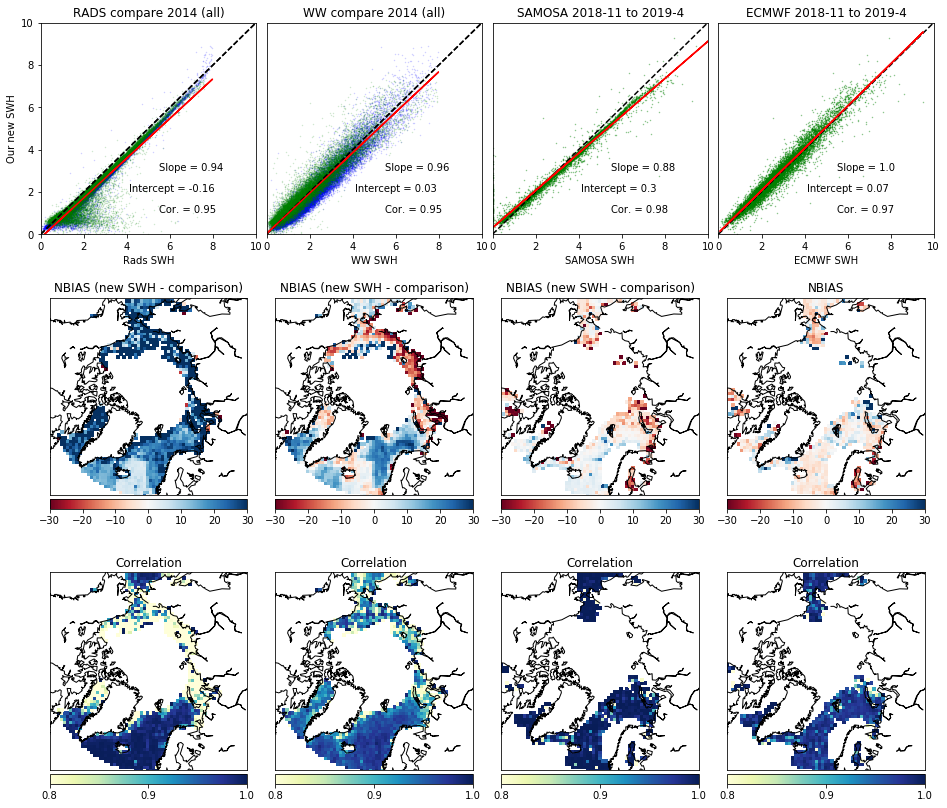

In [532]:
f = plt.figure(figsize=[16,14])
corlim = [0.80,1.0]
pf = np.polynomial.polynomial.polyfit
# labels = ['Our_SWH','Rads_SWH','WW_SWH']
pp=0
start_time = swh_list[0].dates[0]
end_time = swh_list[0].dates[-1]
dt1 = start_time+relativedelta(days=10*pp)
# dt2 = dt1+relativedelta(days=10)
dt2 = end_time
periods = swh_list[0].get_periods(dt1,dt2)
# periods = []
plt.subplot(3,4,1)
scatter_plot(swh_list[1],swh_list[0],LRM_mask,'Rads SWH','Our SWH','RADS compare 2014 (all)',
            alpha=0.2,cl='b',line = False)
scatter_plot(swh_list[1],swh_list[0],SAR_mask,'Rads SWH','','RADS compare 2014 (all)',
            alpha=0.2,cl='g',line = False)
x=swh_list[1].ravel(periods=periods,mask=mix_mask,remove_nan=True)
y=swh_list[0].ravel(periods=periods,mask=mix_mask,remove_nan=True)
b,mp = pf(x,y,1)
plt.text(5.5,3,'Slope = '+str(round(mp,2)))
plt.text(4.1,2,'Intercept = '+str(round(b,2)))
plt.plot(x,b+mp*x,'-r')
cc = np.corrcoef(x,y)[0,1]
plt.text(5.5,1,'Cor. = '+str(round(cc,2)))
plt.ylabel('Our new SWH')

plt.subplot(3,4,5)
plot_nbias(G,swh_list[0],swh_list[1],mix_mask,'NBIAS (new SWH - comparison)',clim = [-30,30],cmap = 'RdBu')
plt.subplot(3,4,9)
plot_cc(G,swh_list[0],swh_list[1],mix_mask,'Correlation',clim = corlim,cmap = 'YlGnBu')

plt.subplot(3,4,2)
scatter_plot(swh_list[2],swh_list[0],LRM_mask,'WW SWH','','All data',
            alpha=0.2,cl='b',line = False,yticks=False)
scatter_plot(swh_list[2],swh_list[0],SAR_mask,'WW SWH','','WW compare 2014 (all)',
            alpha=0.2,cl='g',line = False,yticks=False)
x=swh_list[2].ravel(periods=periods,mask=mix_mask,remove_nan=True)
y=swh_list[0].ravel(periods=periods,mask=mix_mask,remove_nan=True)
b,mp = pf(x,y,1)
plt.text(5.5,3,'Slope = '+str(round(mp,2)))
plt.text(4.1,2,'Intercept = '+str(round(b,2)))
plt.plot(x,b+mp*x,'-r')
cc = np.corrcoef(x,y)[0,1]
plt.text(5.5,1,'Cor. = '+str(round(cc,2)))

plt.subplot(3,4,6)
plot_nbias(G,swh_list[0],swh_list[2],mix_mask,'NBIAS (new SWH - comparison)',clim = [-30,30],cmap = 'RdBu')
plt.subplot(3,4,10)
plot_cc(G,swh_list[0],swh_list[2],mix_mask,'Correlation',clim = corlim,cmap = 'YlGnBu')

plt.subplot(3,4,3)
scatter_plot(swh_list2[2],swh_list2[0],mix_mask2,'SAMOSA SWH','','SAMOSA 2018-11 to 2019-4',
            alpha=0.5,cl='g',yticks=False)
plt.subplot(3,4,7)
plot_nbias(G,swh_list2[0],swh_list2[2],mix_mask2,'NBIAS (new SWH - comparison)',clim = [-30,30],cmap = 'RdBu')
plt.subplot(3,4,11)
plot_cc(G,swh_list2[0],swh_list2[2],mix_mask2,'Correlation',clim = corlim,cmap = 'YlGnBu')

plt.subplot(3,4,4)
scatter_plot(swh_list2[1],swh_list2[0],mix_mask2,'ECMWF SWH','','ECMWF 2018-11 to 2019-4',
            alpha=0.5,cl='g',yticks=False)
plt.subplot(3,4,8)
plot_nbias(G,swh_list2[0],swh_list2[1],mix_mask2,'NBIAS',clim = [-30,30],cmap = 'RdBu')
plt.subplot(3,4,12)
plot_cc(G,swh_list2[0],swh_list2[1],mix_mask2,'Correlation',clim = corlim,cmap = 'YlGnBu')


plt.subplots_adjust(wspace=0.05,hspace=0.3)

plt.show()
f.savefig('RADS_WW_SAMOSA_ECMWF_compare.pdf',bbox_inches = 'tight')

In [524]:
dt2

datetime.datetime(2019, 4, 30, 0, 0)

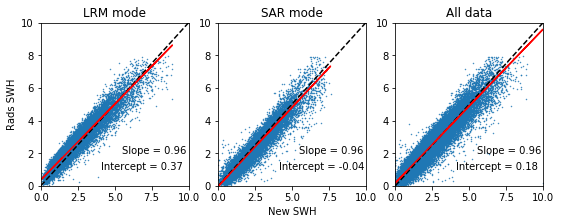

In [347]:
f = plt.figure(figsize=[9,3])
pf = np.polynomial.polynomial.polyfit
# labels = ['Our_SWH','Rads_SWH','WW_SWH']
pp=0
start_time = swh_list[0].dates[0]
end_time = swh_list[0].dates[-1]
dt1 = start_time+relativedelta(days=10*pp)
# dt2 = dt1+relativedelta(days=10)
dt2 = end_time
periods = swh_list[0].get_periods(dt1,dt2)
# periods = []
plt.subplot(1,3,1)
plt.plot([0,10],[0,10],'--k')
x=swh_list[0].ravel(periods=periods,mask=LRM_mask,remove_nan=False)
y=swh_list[2].ravel(periods=periods,mask=LRM_mask,remove_nan=False)
plt.scatter(x,y, s=0.2)
b,mp = pf(x,y,1)
plt.text(5.5,2,'Slope = '+str(round(m,2)))
plt.text(4.1,1,'Intercept = '+str(round(b,2)))
plt.plot(x,b+mp*x,'-r')
plt.ylabel('Rads SWH')
plt.title('LRM mode')
plt.xlim([0,10])
plt.ylim([0,10])

plt.subplot(1,3,2)
plt.plot([0,10],[0,10],'--k')
x=swh_list[0].ravel(periods=periods,mask=SAR_mask,remove_nan=True)
y=swh_list[2].ravel(periods=periods,mask=SAR_mask,remove_nan=True)
plt.scatter(x,y, s=0.2)
b,mp = pf(x,y,1)
plt.text(5.5,2,'Slope = '+str(round(m,2)))
plt.text(4.1,1,'Intercept = '+str(round(b,2)))
plt.plot(x,b+mp*x,'-r')
plt.xlabel('New SWH')
# plt.ylabel(labels[2])
plt.title('SAR mode')
plt.xlim([0,10])
plt.ylim([0,10])

plt.subplot(1,3,3)
plt.plot([0,10],[0,10],'--k')
x=swh_list[0].ravel(periods=periods,mask=mix_mask,remove_nan=True)
y=swh_list[2].ravel(periods=periods,mask=mix_mask,remove_nan=True)
plt.scatter(x,y, s=0.2)
b,mp = pf(x,y,1)
plt.text(5.5,2,'Slope = '+str(round(m,2)))
plt.text(4.1,1,'Intercept = '+str(round(b,2)))
plt.plot(x,b+mp*x,'-r')
# plt.xlabel(labels[0])
# plt.ylabel(labels[1])
plt.title('All data')
plt.xlim([0,10])
plt.ylim([0,10])

plt.show()
# f.savefig('SWH_rads_mode_vs_mode.pdf',bbox_inches = 'tight')
# f.savefig('SWH_rads_mode_vs_mode_fixed_2014_2-4.pdf',bbox_inches = 'tight')

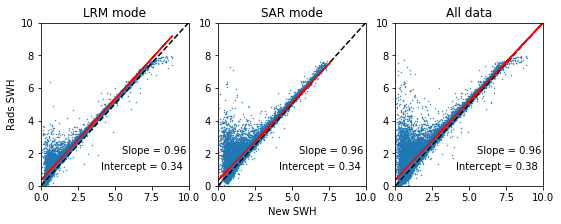

In [346]:
f = plt.figure(figsize=[9,3])
pf = np.polynomial.polynomial.polyfit
# labels = ['Our_SWH','Rads_SWH','WW_SWH']
pp=0
start_time = swh_list[0].dates[0]
end_time = swh_list[0].dates[-1]
dt1 = start_time+relativedelta(days=10*pp)
# dt2 = dt1+relativedelta(days=10)
dt2 = end_time
periods = swh_list[0].get_periods(dt1,dt2)
# periods = []
plt.subplot(1,3,1)
plt.plot([0,10],[0,10],'--k')
x=swh_list[0].ravel(periods=periods,mask=LRM_mask,remove_nan=False)
y=swh_list[1].ravel(periods=periods,mask=LRM_mask,remove_nan=False)
plt.scatter(x,y, s=0.2)
b,mp = pf(x,y,1)
cc = np.corrcoef(x,y)[0,1]
plt.text(5.5,2,'Slope = '+str(round(m,2)))
plt.text(4.1,1,'Intercept = '+str(round(b,2)))
plt.plot(x,b+mp*x,'-r')
plt.ylabel('Rads SWH')
plt.title('LRM mode')
plt.xlim([0,10])
plt.ylim([0,10])

plt.subplot(1,3,2)
plt.plot([0,10],[0,10],'--k')
x=swh_list[0].ravel(periods=periods,mask=SAR_mask,remove_nan=True)
y=swh_list[1].ravel(periods=periods,mask=SAR_mask,remove_nan=True)
plt.scatter(x,y, s=0.2)
b,mp = pf(x,y,1)
cc = np.corrcoef(x,y)[0,1]
plt.text(5.5,2,'Slope = '+str(round(m,2)))
plt.text(4.1,1,'Intercept = '+str(round(b,2)))
plt.plot(x,b+mp*x,'-r')
plt.xlabel('New SWH')
# plt.ylabel(labels[2])
plt.title('SAR mode')
plt.xlim([0,10])
plt.ylim([0,10])

plt.subplot(1,3,3)
plt.plot([0,10],[0,10],'--k')
x=swh_list[0].ravel(periods=periods,mask=mix_mask,remove_nan=True)
y=swh_list[1].ravel(periods=periods,mask=mix_mask,remove_nan=True)
plt.scatter(x,y, s=0.2)
b,mp = pf(x,y,1)
cc = np.corrcoef(x,y)[0,1]
plt.text(5.5,2,'Slope = '+str(round(m,2)))
plt.text(4.1,1,'Intercept = '+str(round(b,2)))
plt.plot(x,b+mp*x,'-r')
# plt.xlabel(labels[0])
# plt.ylabel(labels[1])
plt.title('All data')
plt.xlim([0,10])
plt.ylim([0,10])

plt.show()
# f.savefig('SWH_rads_mode_vs_mode.pdf',bbox_inches = 'tight')
# f.savefig('SWH_rads_mode_vs_mode_fixed_2014_2-4.pdf',bbox_inches = 'tight')

In [397]:
swh_list2 = []
# swh_list.append(dy.load_data_year('/Users/H/WAVES/SWH/swh_arrays/SWH_100km_1d_2014_fixed_raw.npz'))
# swh_list.append(dy.load_data_year('/Users/H/WAVES/SWH/swh_arrays/SWH_100k_raw_2011-2019.npz'))
swh_list2.append(dy.load_data_year('/Volumes/BU_extra/CryoSat/SWH/swh_arrays/SWH_100km_1d_all_orb_raw.npz'))
swh_list2.append(dy.load_data_year('/Users/H/WAVES/SWH/swh_arrays/GPOD_100km_1_day_raw.npz'))
swh_list2.append(dy.load_data_year('/Users/H/WAVES/SWH/swh_arrays/GPOD_100km_1_day_ECMWF.npz'))


In [400]:
# ice_binned = dy.load_data_year('/Users/H/WAVES/SWH_rads/Ice_binned_2014_(all).npz')
# ice_binned = dy.load_data_year('/Users/H/WAVES/SWH_rads/Ice_binned_2014_(02-04).npz')
ice_binned2 = dy.load_data_year('/Volumes/BU_extra/NSIDC/daily/2011-2019_100km_grided.npz')

In [401]:
ice_binned2.cut_date(swh_list2[1].dates[0],swh_list2[1].dates[-1])
swh_list2[0].cut_date(swh_list2[1].dates[0],swh_list2[1].dates[-1])
swh_list2[1].cut_date(swh_list2[1].dates[0],swh_list2[1].dates[-1])
swh_list2[2].cut_date(swh_list2[1].dates[0],swh_list2[1].dates[-1])


removing 3106 time points
New data_year, size 181, for 2 years
removing 0 time points
New data_year, size 181, for 2 years
removing 0 time points
New data_year, size 181, for 2 years
removing 0 time points
New data_year, size 181, for 2 years
removing 1 time points
New data_year, size 1, for 1 years
removing 1 time points
New data_year, size 1, for 1 years


In [405]:
# temp = swh.ravel(mask=True) 
ocean_only2 = np.ones_like(swh_list2[1].data,dtype=bool)
ocean_only2[ice_binned2.mask] = False
for i in range(0,3):
    swh_list2[i].mask = ocean_only2
# swh.build_static_mask(np.isnan())

In [406]:
mix_mask2 = np.ones_like(swh_list2[0].data,dtype=bool)
for i in range(3):
    print(np.sum(np.isfinite(swh_list2[i].data)))
    mix_mask2[swh_list2[i].mask==False] = False
    mix_mask2[np.isnan(swh_list2[i].data)] = False
np.sum(mix_mask2)

43210
10595
85276


10039

In [407]:
for i in range(3):
    print(np.shape(swh_list2[i].ravel(periods=periods,mask=mix_mask2,remove_nan=True)))

(9965,)
(9965,)
(9965,)


/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


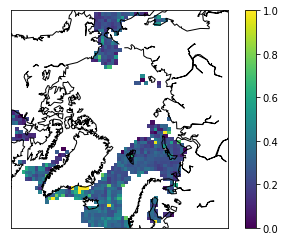

/Users/H/WAVES/geo_data_group/data_year.py:384: RuntimeWarning: Mean of empty slice
  axis = 0)


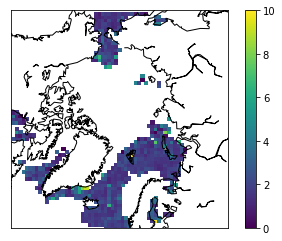

/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


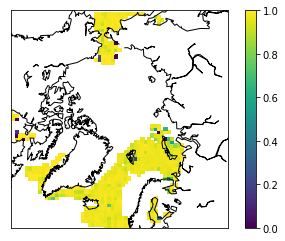

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice


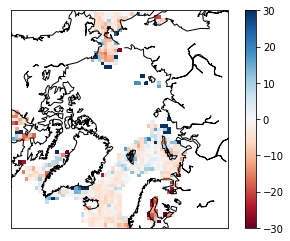

In [434]:
temp = (swh_list2[0].data-swh_list2[1].data)**2
temp[ocean_only2==False] = np.nan
temp_mean = np.nanmean(temp,axis=0)
# m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T,norm=cl.LogNorm(),
#              vmin=2e-1,vmax=8e-1)
m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T)
m.drawcoastlines()
# plt.clim([1e-2,10])
plt.clim([0.0,1.0])
# plt.imshow(np.nansum(ocean_only2,axis=0))
plt.colorbar()
plt.show()

# m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T,norm=cl.LogNorm(),
#              vmin=2e-1,vmax=8e-1)
temp_mean=temp_mean/swh_list2[0].clim_map(periods=periods,mask=ocean_only2)
m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean*100).T)
m.drawcoastlines()
# plt.clim([1e-2,10])
plt.clim([0.0,10])
# plt.imshow(np.nansum(ocean_only,axis=0))
plt.colorbar()
plt.show()

CorCoeff = CorCoeff_array(swh_list2[0].data,swh_list2[1].data,
                         mask = ocean_only2)

m.pcolormesh(G.xptp,G.yptp,CorCoeff.T)
m.drawcoastlines()
# plt.clim([1e-2,10])
plt.clim([0.0,1])
# plt.imshow(np.nansum(ocean_only2,axis=0))
plt.colorbar()
plt.show()


start_time = swh_list2[0].dates[0]
end_time = swh_list2[0].dates[-1]
dt1 = start_time+relativedelta(days=10*pp)
# dt2 = dt1+relativedelta(days=10)
dt2 = end_time
periods = swh_list2[0].get_periods(dt1,dt2)
temp = (swh_list2[1].data-swh_list2[0].data)/swh_list2[0].data
temp[ocean_only2==False] = np.nan
# temp_mean=swh_list2[0].clim_map(periods=periods,mask=ocean_only2)
# temp_mean=np.nanmean(temp,axis=0)/temp_mean*100
temp_mean=np.nanmean(temp,axis=0)*100
# m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T,norm=cl.LogNorm(),
#              vmin=2e-1,vmax=8e-1)
m.pcolormesh(G.xptp,G.yptp,temp_mean.T,cmap='RdBu')
m.drawcoastlines()
plt.clim([-30,30])
# plt.clim([0.2,0.8])
# plt.imshow(np.nansum(ocean_only2,axis=0))
plt.colorbar()
plt.show()

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until


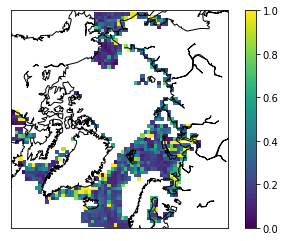

/Users/H/WAVES/geo_data_group/data_year.py:384: RuntimeWarning: Mean of empty slice
  axis = 0)
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


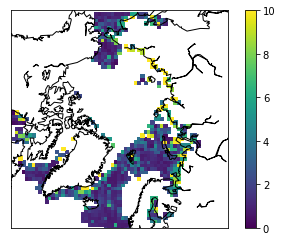

/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/H/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/H/anaconda/lib/python3.6/sit

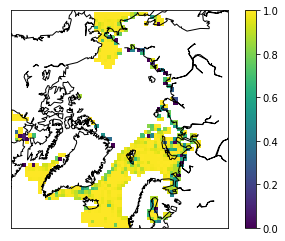

/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide
/Users/H/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/H/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:47: RuntimeWarning: Mean of empty slice


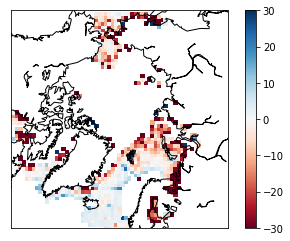

In [522]:
temp = (swh_list2[0].data-swh_list2[2].data)**2
temp[ocean_only2==False] = np.nan
temp_mean = np.nanmean(temp,axis=0)
# m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T,norm=cl.LogNorm(),
#              vmin=2e-1,vmax=8e-1)
m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T)
m.drawcoastlines()
# plt.clim([1e-2,10])
plt.clim([0.0,1.0])
# plt.imshow(np.nansum(ocean_only2,axis=0))
plt.colorbar()
plt.show()

# m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T,norm=cl.LogNorm(),
#              vmin=2e-1,vmax=8e-1)
temp_mean=temp_mean/swh_list2[0].clim_map(periods=periods,mask=ocean_only2)
m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean*100).T)
m.drawcoastlines()
# plt.clim([1e-2,10])
plt.clim([0.0,10])
# plt.imshow(np.nansum(ocean_only,axis=0))
plt.colorbar()
plt.show()

CorCoeff = CorCoeff_array(swh_list2[0].data,swh_list2[2].data,
                         mask = ocean_only2)

m.pcolormesh(G.xptp,G.yptp,CorCoeff.T)
m.drawcoastlines()
# plt.clim([1e-2,10])
plt.clim([0.0,1])
# plt.imshow(np.nansum(ocean_only2,axis=0))
plt.colorbar()
plt.show()


start_time = swh_list2[0].dates[0]
end_time = swh_list2[0].dates[-1]
dt1 = start_time+relativedelta(days=10*pp)
# dt2 = dt1+relativedelta(days=10)
dt2 = end_time
periods = swh_list2[0].get_periods(dt1,dt2)
temp = (swh_list2[2].data-swh_list2[0].data)/swh_list2[0].data
temp[ocean_only2==False] = np.nan
# temp_mean=swh_list2[0].clim_map(periods=periods,mask=ocean_only2)
# temp_mean=np.nanmean(temp,axis=0)/temp_mean*100
temp_mean=np.nanmean(temp,axis=0)*100
# m.pcolormesh(G.xptp,G.yptp,np.sqrt(temp_mean).T,norm=cl.LogNorm(),
#              vmin=2e-1,vmax=8e-1)
m.pcolormesh(G.xptp,G.yptp,temp_mean.T,cmap='RdBu')
m.drawcoastlines()
plt.clim([-30,30])
# plt.clim([0.2,0.8])
# plt.imshow(np.nansum(ocean_only2,axis=0))
plt.colorbar()
plt.show()